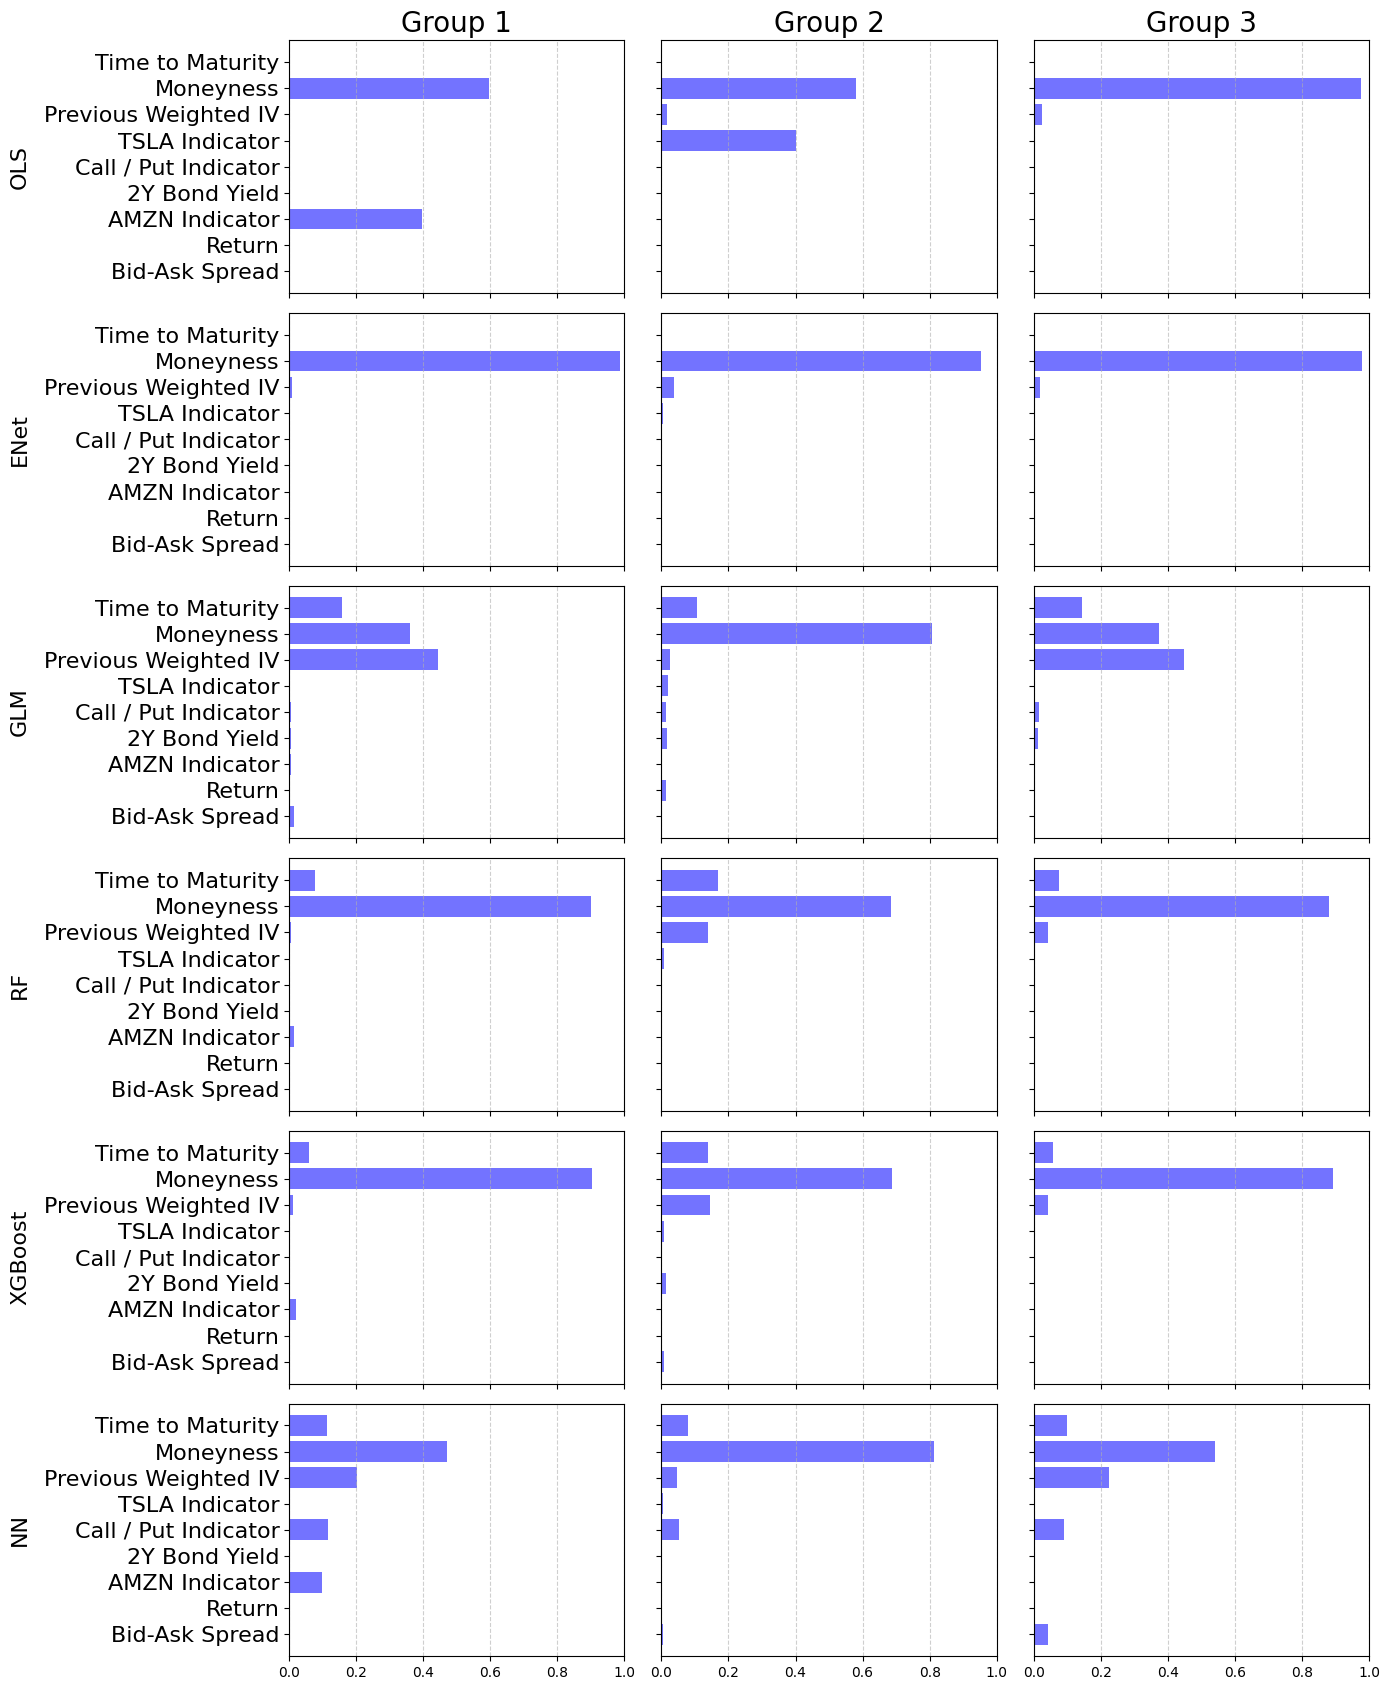

In [17]:
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

correct_order = [
    'Time to Maturity',
    'Moneyness',
    'Previous Weighted IV',
    'TSLA Indicator',
    'Call / Put Indicator',
    '2Y Bond Yield',
    'AMZN Indicator',
    'Return',
    'Bid-Ask Spread']

# Define the groups
groups = ["Group 1", "Group 2", "Group 3"]

# Example importance data for each group (replace with your actual data)
glm_importance_group1 = [0.156880102179564, 0.3610180679135576, 0.4447734467196797, 0.0, 0.0066022732125321235, 0.006634631643179253, 0.006950885980494103, 0.0014009157202330346, 0.015739676630760254]
glm_importance_group2 = [0.10611065996755498, 0.8055485013403413, 0.02618296184111921, 0.019019307266414466, 0.012319063003043843, 0.015990702102729328, 0.0, 0.013038912120459122, 0.0017898923583377845]
glm_importance_group3 = [0.14376025902431186, 0.374238665143925, 0.44811040979664757, 0.0, 0.015322498474274894, 0.012257674639788283, 0.0, 0.0030540348143818343, 0.0032564581066705455]

enet_importance_group1 = [0.0007485192939401948, 0.98658546812863, 0.00779089828567458, 0.0, 0.0012515639633545231, 0.0008777284484351821, 0.000934053472772522, 5.0629274693764924e-06, 0.0018067054797235315]
enet_importance_group2 = [0.0007446082934437195, 0.9529305524347674, 0.03824732950520018, 0.0056737732258643585, 0.0011363751395674876, 0.00079481457578209, 0.0, 1.3391961743988623e-05, 0.0004591548636308468]
enet_importance_group3 = [0.0006630514635451172, 0.9787937752612982, 0.01861993759434878, 0.0, 0.0009566192272917452, 0.0008181556619112895, 0.0, 4.196981030702056e-06, 0.00014426381057419384]

nn_importance_group1 = [0.11360677392089381, 0.470991933015997, 0.20115550288221737, 0.0, 0.11617607700761248, 0.0, 0.09806971317327938, 0.0, 0.0]
nn_importance_group2 = [0.07880745998780381, 0.8125956956016726, 0.045840000251749016, 0.004293449772051172, 0.05242091551487308, 0.0, 0.0, 0.0008133106497927499, 0.005229168222057648]
nn_importance_group3 = [0.10012812636846086, 0.5399869145043307, 0.22595664779290173, 0.0, 0.09044623676769227, 1.2825199067341357e-05, 0.0, 0.0, 0.04346924936754717]

ols_importance_group1 = [0.000225566863549948, 0.5946808407793567, 0.0038358625287524552, 0.0, 0.0003441793390903945, 0.0013268959883882966, 0.3967804635860757, 2.9740325401356857e-05, 0.0027764505893851715]
ols_importance_group2 = [0.00017139771567189986, 0.5802704226832991, 0.016657554929110148, 0.40220133769080735, 0.00040474806345508897, 0.00022293019283444455, 0.0, 1.5731237893620204e-05, 5.587748692839965e-05]
ols_importance_group3 = [8.435192883171737e-05, 0.9753268370206573, 0.023887114656506545, 0.0, 9.483566473795217e-05, 0.0002204123537556053, 0.0, 0.000196775108304146, 0.0001896732672068913]

rf_importance_group1 = [0.0758989119921261, 0.901544475845257, 0.00706932691019873, 0.0, 0.0, 0.0, 0.015116813143825776, 0.0, 0.000370472108592274]
rf_importance_group2 = [0.16981315285302404, 0.6840226567616499, 0.1385289880644011, 0.006940602479960002, 0.0, 0.0004582314420028872, 0.0, 0.0, 0.00023636839896241287]
rf_importance_group3 = [0.07658202179307882, 0.8793870304535928, 0.043724766220445896, 0.0, 3.614177547571617e-05, 0.0, 0.0, 0.0002672957623647298, 2.7439950420219766e-06]

xgb_importance_group1 = [0.06072495993220835, 0.9035753470144786, 0.010583083622443715, 0.0, 0.0, 0.004089775924848624, 0.020444555776963955, 0.00038603165217598336, 0.0001962460768807799]
xgb_importance_group2 = [0.13846957537745208, 0.688006055492603, 0.14464061446845689, 0.008991155316789887, 0.0, 0.013111605083142434, 0.0, 5.2322510604339895e-05, 0.006728671750951512]
xgb_importance_group3 = [0.05825963792805757, 0.8934891674637025, 0.04392578639265888, 0.0, 0.0, 0.0020687489549665677, 0.0, 0.0007799031225306184, 0.0014767561380839146]

models = [
    ("OLS", [ols_importance_group1, ols_importance_group2, ols_importance_group3]),
    ("ENet", [enet_importance_group1, enet_importance_group2, enet_importance_group3]),
    ("GLM", [glm_importance_group1, glm_importance_group2, glm_importance_group3]),
    ("RF", [rf_importance_group1, rf_importance_group2, rf_importance_group3]),
    ("XGBoost", [xgb_importance_group1, xgb_importance_group2, xgb_importance_group3]),
    ("NN", [nn_importance_group1, nn_importance_group2, nn_importance_group3])
]

# Create a figure with 6 rows (models) and 3 columns (groups)
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(14, 17), sharex=True, sharey=True)

# Iterate over models and groups to populate the subplots
for row_idx, (model_name, grouped_importances) in enumerate(models):  # Iterate over models (rows)
    for col_idx, group in enumerate(groups):  # Iterate over groups (columns)
        ax = axes[row_idx, col_idx]  # Access the corresponding subplot
        importance = grouped_importances[col_idx]  # Get the importance for the current group
        ax.barh(correct_order[::-1], importance[::-1], color='blue', alpha=0.55)
        ax.set_xlim(0, 1)
        if row_idx == 0:  # Add group title on top for the first row
            ax.set_title(group, fontsize=20)
        if col_idx == 0:  # Add model name as y-axis label for the first column
            ax.set_ylabel(model_name, fontsize=16, labelpad=10)
        ax.tick_params(axis='y', labelsize=16)
        ax.grid(axis='x', linestyle='--', alpha=0.6)

# Adjust layout and labels
plt.tight_layout()

# Save and display the figure
plt.show()

# Save the figure to a PDF
with PdfPages('feature_importance_plots_groups.pdf') as pdf:
    pdf.savefig(fig)


In [24]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Data for feature importance grouped by models and groups
grouped_data = {
    'Group 1': {
        'OLS': ols_importance_group1,
        'ENet': enet_importance_group1,
        'GLM': glm_importance_group1,
        'RF': rf_importance_group1,
        'XGBoost': xgb_importance_group1,
        'NN': nn_importance_group1,
    },
    'Group 2': {
        'OLS': ols_importance_group2,
        'ENet': enet_importance_group2,
        'GLM': glm_importance_group2,
        'RF': rf_importance_group2,
        'XGBoost': xgb_importance_group2,
        'NN': nn_importance_group2,
    },
    'Group 3': {
        'OLS': ols_importance_group3,
        'ENet': enet_importance_group3,
        'GLM': glm_importance_group3,
        'RF': rf_importance_group3,
        'XGBoost': xgb_importance_group3,
        'NN': nn_importance_group3,
    }
}

# Iterate over groups to create separate PDFs
for group_name, data in grouped_data.items():
    # Create a DataFrame for the current group
    df = pd.DataFrame(data, index=correct_order)
    
    # Calculate total importance for each feature
    df['Total'] = df.sum(axis=1)
    
    # Sort the features by total importance in descending order
    df = df.sort_values(by='Total', ascending=False)
    
    # Drop the 'Total' column after sorting
    df = df.drop(columns=['Total'])
    
    # Generate the PDF filename dynamically
    pdf_filename = f'feature_importance_heatmap_{group_name.replace(" ", "_")}.pdf'
    
    # Create the heatmap and save to the PDF
    with PdfPages(pdf_filename) as pdf:
        plt.figure(figsize=(12, 6))
        sns.heatmap(df, annot=False, cmap='Blues', linewidths=0.5, fmt=".2f")
        
        # Add labels and title
        plt.title(f'{group_name}', fontsize=16)
        # plt.xlabel('Models', fontsize=14)
        # plt.ylabel('Features', fontsize=14)
        # plt.xticks(rotation=45, ha='right', fontsize=12)
        plt.xticks( fontsize=12)
        plt.yticks(fontsize=12)
        
        # Save the heatmap to the PDF
        plt.tight_layout()
        pdf.savefig()
        plt.close()


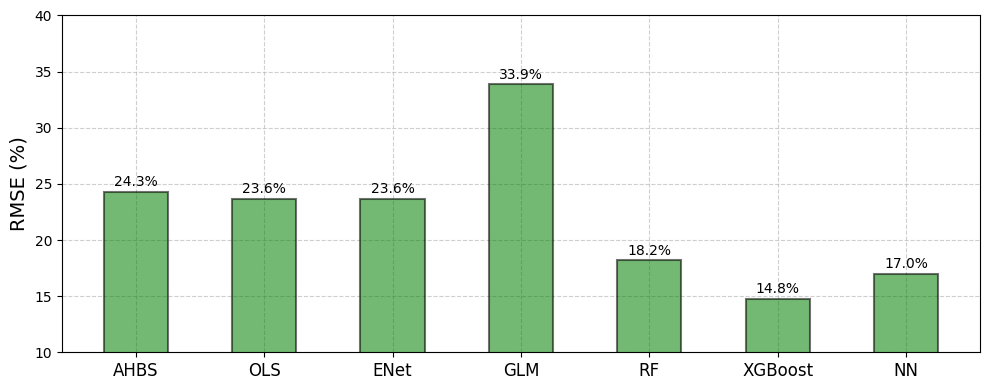

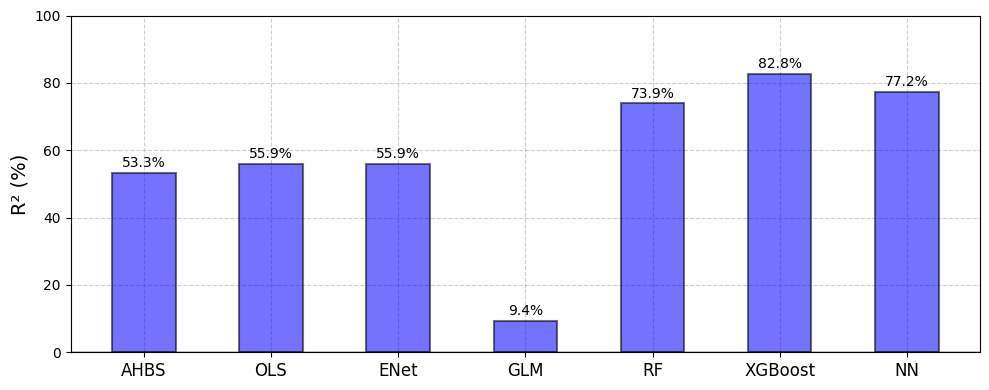

In [114]:
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting
models = ['AHBS', 'OLS', 'ENet', 'GLM', 'RF', 'XGBoost', 'NN']

# RMSE and R² values for each model
# rmse = [0.2168766433270091, 0.18988511419157794, 0.1898747842201685, 0.1633458171448721, 0.1156523073563094, 0.11373950960102398, 0.11292614449453443]
# r2 = [0.5041254773031247, 0.6198735674575515, 0.6199149249740525, 0.7187048363843326, 0.8589884023688723, 0.8636142700335201, 0.8655579174468371]

rmse = [0.24316408771757114, 0.23638466548194922,  0.2363919591060455, 0.33871902057140335, 0.18179028474591927, 0.1476777952418596, 0.169820686650075]
r2 = [0.5328875240803013, 0.5585706597253386, 0.5585434187929625,  0.09363784023968591, 0.7389258121666933, 0.8277128068378452, 0.7721737399193794]


# Scale values for the plots to percentages
rmse_scaled = [value * 100 for value in rmse]
r2_scaled = [value * 100 for value in r2]

# Set up bar width and indices for bars
bar_width = 0.5
index = np.arange(len(models))


def add_labels_and_borders(ax, rects, scaled_values):
    """
    Add labels outside the bars and black borders to the bars.

    Parameters:
    ax: The axis to add labels and borders.
    rects: The bars to annotate.
    scaled_values: Scaled values used for labels.
    """
    for rect, scaled_value in zip(rects, scaled_values):
        # Add black borders to bars
        rect.set_edgecolor('black')
        rect.set_linewidth(1.5)

        # Add text labels
        height = rect.get_height()
        label = f'{scaled_value:.1f}%'  # Display percentage values
        xytext = (0, -5) if height < 0 else (0, 2)  # Adjust label position
        ax.annotate(label,
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=xytext,
                    textcoords="offset points",
                    ha='center', va='top' if height < 0 else 'bottom')


# Plot Average RMSE
fig_rmse, ax_rmse = plt.subplots(figsize=(10, 4))
rects_rmse = ax_rmse.bar(index, rmse_scaled, bar_width, color='green', alpha=0.55, label='RMSE')

add_labels_and_borders(ax_rmse, rects_rmse, rmse_scaled)

# Labels and titles for RMSE plot
# ax_rmse.set_xlabel('Models', fontsize=14)
ax_rmse.set_ylabel('RMSE (%)', fontsize=14)
ax_rmse.set_xticks(index)
ax_rmse.set_xticklabels(models, fontsize=12)
ax_rmse.grid(True, linestyle='--', alpha=0.6)
ax_rmse.set_axisbelow(True)
ax_rmse.set_ylim([10, 40])  # Adjusted scale for percentages

# Save and display RMSE plot
plt.tight_layout()
fig_rmse.savefig("rmse_plot_scaled_all.pdf", format='pdf')
plt.show()

# Plot R²
fig_r2, ax_r2 = plt.subplots(figsize=(10, 4))
rects_r2 = ax_r2.bar(index, r2_scaled, bar_width, color='blue', alpha=0.55, label='R²')

add_labels_and_borders(ax_r2, rects_r2, r2_scaled)

# Add horizontal line at y=0
ax_r2.axhline(0, color='black', linewidth=1)

# Labels and titles for R² plot
# ax_r2.set_xlabel('Models', fontsize=14)
ax_r2.set_ylabel('R² (%)', fontsize=14)
ax_r2.set_xticks(index)
ax_r2.set_xticklabels(models, fontsize=12)
ax_r2.grid(True, linestyle='--', alpha=0.6)
ax_r2.set_axisbelow(True)
ax_r2.set_ylim([0, 100])  # Adjusted scale for percentages

# Save and display R² plot
plt.tight_layout()
fig_r2.savefig("r2_plot_scaled_all.pdf", format='pdf')
plt.show()

In [12]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Data for plotting
# models = ['ADHOC BS', 'OLS', 'ENet', 'GLM', 'NN', 'RF', 'XGBoost']

# # RMSE and R² values for each model
# rmse = [0.21302919315555444, 0.18987478422016849, 0.18987478422016849, 0.1633458171448721, 0.11094891939008605, 0.11565230735630941, 0.11129540124283503]
# r2 = [0.025264296802188793, 0.34849503779156304, 0.34849503779156304, 0.5383418606925432, 0.7968247099298664,  0.7957587251105774, 0.8040126657368408]

# # Scale values for the plots (divide by 100 for percentages)
# rmse_scaled = [value for value in rmse]
# r2_scaled = [value for value in r2]

# # Set up bar width and indices for bars
# bar_width = 0.5
# index = np.arange(len(models))


# def add_labels_and_borders(ax, rects, scaled_values):
#     """
#     Add labels outside the bars and black borders to the bars.

#     Parameters:
#     ax: The axis to add labels and borders.
#     rects: The bars to annotate.
#     scaled_values: Scaled values used for labels.
#     """
#     for rect, scaled_value in zip(rects, scaled_values):
#         # Add black borders to bars
#         rect.set_edgecolor('black')
#         rect.set_linewidth(1.5)

#         # Add text labels
#         height = rect.get_height()
#         label = f'{scaled_value * 100:.1f}%'  # Display percentage values
#         xytext = (0, -5) if height < 0 else (0, 2)  # Adjust label position
#         ax.annotate(label,
#                     xy=(rect.get_x() + rect.get_width() / 2, height),
#                     xytext=xytext,
#                     textcoords="offset points",
#                     ha='center', va='top' if height < 0 else 'bottom')


# # Plot Average RMSE
# fig_rmse, ax_rmse = plt.subplots(figsize=(10, 6))
# rects_rmse = ax_rmse.bar(index, rmse_scaled, bar_width, color='green', alpha=0.55, label='RMSE')

# add_labels_and_borders(ax_rmse, rects_rmse, rmse_scaled)

# # Labels and titles for RMSE plot
# ax_rmse.set_xlabel('Models', fontsize=14)
# ax_rmse.set_ylabel('RMSE', fontsize=14)
# ax_rmse.set_xticks(index)
# ax_rmse.set_xticklabels(models, fontsize=12)
# ax_rmse.grid(True, linestyle='--', alpha=0.6)
# ax_rmse.set_axisbelow(True)
# ax_rmse.set_ylim([0, 0.3])  # Adjusted scale for percentages divided by 100

# # Save and display RMSE plot
# plt.tight_layout()
# fig_rmse.savefig("rmse_plot_scaled.pdf", format='pdf')
# plt.show()

# # Plot R²
# fig_r2, ax_r2 = plt.subplots(figsize=(10, 6))
# rects_r2 = ax_r2.bar(index, r2_scaled, bar_width, color='blue', alpha=0.55, label='R²')

# add_labels_and_borders(ax_r2, rects_r2, r2_scaled)

# # Add horizontal line at y=0
# ax_r2.axhline(0, color='black', linewidth=1)

# # Labels and titles for R² plot
# ax_r2.set_xlabel('Models', fontsize=14)
# ax_r2.set_ylabel('R²', fontsize=14)
# ax_r2.set_xticks(index)
# ax_r2.set_xticklabels(models, fontsize=12)
# ax_r2.grid(True, linestyle='--', alpha=0.6)
# ax_r2.set_axisbelow(True)
# ax_r2.set_ylim([0, 0.9])  # Adjusted scale for percentages divided by 100

# # Save and display R² plot
# plt.tight_layout()
# fig_r2.savefig("r2_plot_scaled.pdf", format='pdf')
# plt.show()


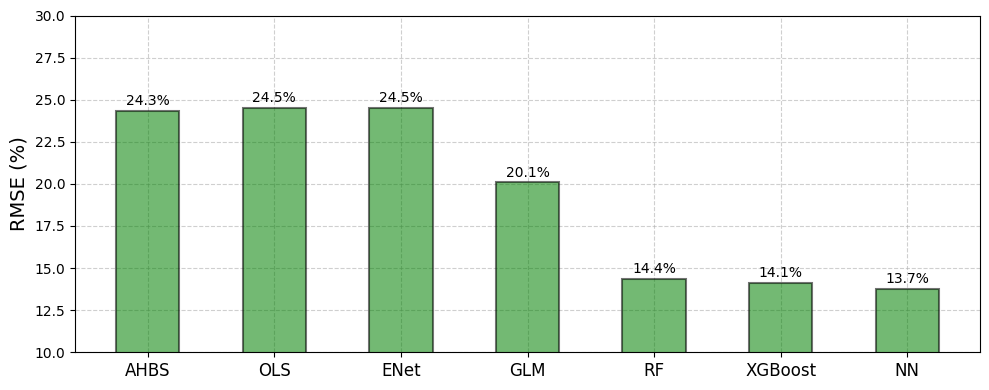

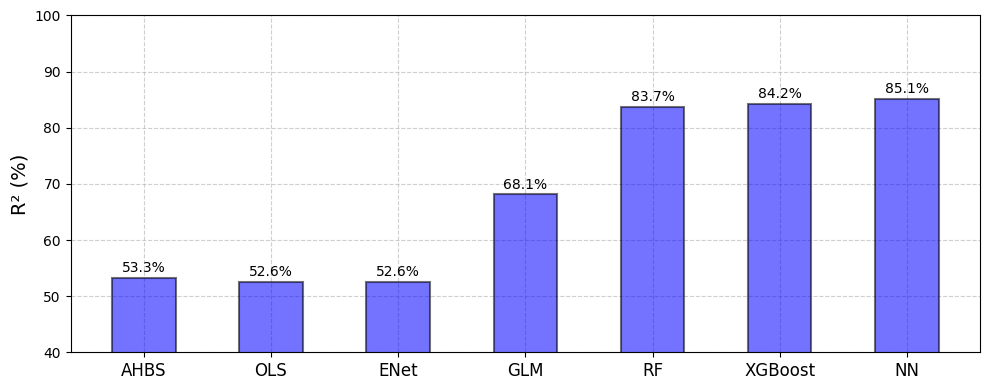

In [34]:
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting
models = ['AHBS', 'OLS', 'ENet', 'GLM', 'RF', 'XGBoost', 'NN']

# RMSE and R² values for each model
# rmse = [0.2168766433270091, 0.18988511419157794, 0.1898747842201685, 0.1633458171448721, 0.1156523073563094, 0.11373950960102398, 0.11292614449453443]
# r2 = [0.5041254773031247, 0.6198735674575515, 0.6199149249740525, 0.7187048363843326, 0.8589884023688723, 0.8636142700335201, 0.8655579174468371]

rmse = [0.24316408771757114, 0.245053356814091,0.2450539977627276, 0.20091150201022298, 0.14370611567870073, 0.1412169671783005, 0.1374437486625748]
r2 = [0.5328875240803013, 0.5256, 0.5256, 0.6811163908680506, 0.8368552520425675, 0.8424579993764194, 0.8507643507994849]


# Scale values for the plots to percentages
rmse_scaled = [value * 100 for value in rmse]
r2_scaled = [value * 100 for value in r2]

# Set up bar width and indices for bars
bar_width = 0.5
index = np.arange(len(models))


def add_labels_and_borders(ax, rects, scaled_values):
    """
    Add labels outside the bars and black borders to the bars.

    Parameters:
    ax: The axis to add labels and borders.
    rects: The bars to annotate.
    scaled_values: Scaled values used for labels.
    """
    for rect, scaled_value in zip(rects, scaled_values):
        # Add black borders to bars
        rect.set_edgecolor('black')
        rect.set_linewidth(1.5)

        # Add text labels
        height = rect.get_height()
        label = f'{scaled_value:.1f}%'  # Display percentage values
        xytext = (0, -5) if height < 0 else (0, 2)  # Adjust label position
        ax.annotate(label,
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=xytext,
                    textcoords="offset points",
                    ha='center', va='top' if height < 0 else 'bottom')


# Plot Average RMSE
fig_rmse, ax_rmse = plt.subplots(figsize=(10, 4))
rects_rmse = ax_rmse.bar(index, rmse_scaled, bar_width, color='green', alpha=0.55, label='RMSE')

add_labels_and_borders(ax_rmse, rects_rmse, rmse_scaled)

# Labels and titles for RMSE plot
# ax_rmse.set_xlabel('Models', fontsize=14)
ax_rmse.set_ylabel('RMSE (%)', fontsize=14)
ax_rmse.set_xticks(index)
ax_rmse.set_xticklabels(models, fontsize=12)
ax_rmse.grid(True, linestyle='--', alpha=0.6)
ax_rmse.set_axisbelow(True)
ax_rmse.set_ylim([10, 30])  # Adjusted scale for percentages

# Save and display RMSE plot
plt.tight_layout()
fig_rmse.savefig("rmse_plot_scaled.pdf", format='pdf')
plt.show()

# Plot R²
fig_r2, ax_r2 = plt.subplots(figsize=(10, 4))
rects_r2 = ax_r2.bar(index, r2_scaled, bar_width, color='blue', alpha=0.55, label='R²')

add_labels_and_borders(ax_r2, rects_r2, r2_scaled)

# Add horizontal line at y=0
ax_r2.axhline(0, color='black', linewidth=1)

# Labels and titles for R² plot
# ax_r2.set_xlabel('Models', fontsize=14)
ax_r2.set_ylabel('R² (%)', fontsize=14)
ax_r2.set_xticks(index)
ax_r2.set_xticklabels(models, fontsize=12)
ax_r2.grid(True, linestyle='--', alpha=0.6)
ax_r2.set_axisbelow(True)
ax_r2.set_ylim([40, 100])  # Adjusted scale for percentages

# Save and display R² plot
plt.tight_layout()
fig_r2.savefig("r2_plot_scaled.pdf", format='pdf')
plt.show()


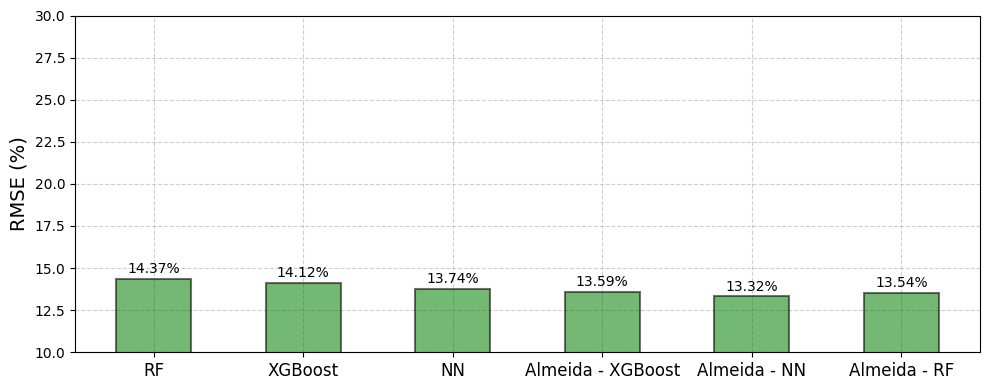

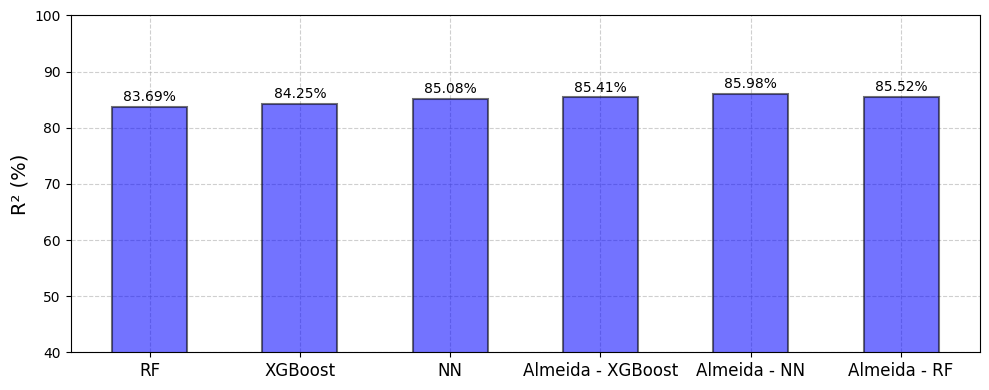

In [36]:
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting total list
models = ['RF', 'XGBoost', 'NN', 'Almeida - XGBoost', 'Almeida - NN', 'Almeida - RF']

# RMSE and R² values for each model
rmse = [0.14370611567870073, 0.1412169671783005, 0.1374437486625748, 0.1359, 0.1332, 0.1354]
r2 = [0.8368552520425675, 0.8424579993764194, 0.8507643507994849, 0.8541,  0.8598,  0.8552]

# Scale values for the plots to percentages
rmse_scaled = [value * 100 for value in rmse]
r2_scaled = [value * 100 for value in r2]

# Set up bar width and indices for bars
bar_width = 0.5
index = np.arange(len(models))


def add_labels_and_borders(ax, rects, scaled_values):
    """
    Add labels outside the bars and black borders to the bars.

    Parameters:
    ax: The axis to add labels and borders.
    rects: The bars to annotate.
    scaled_values: Scaled values used for labels.
    """
    for rect, scaled_value in zip(rects, scaled_values):
        # Add black borders to bars
        rect.set_edgecolor('black')
        rect.set_linewidth(1.5)

        # Add text labels
        height = rect.get_height()
        label = f'{scaled_value:.2f}%'  # Display percentage values
        xytext = (0, -5) if height < 0 else (0, 2)  # Adjust label position
        ax.annotate(label,
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=xytext,
                    textcoords="offset points",
                    ha='center', va='top' if height < 0 else 'bottom')


# Plot Average RMSE
fig_rmse, ax_rmse = plt.subplots(figsize=(10, 4))
rects_rmse = ax_rmse.bar(index, rmse_scaled, bar_width, color='green', alpha=0.55, label='RMSE')

add_labels_and_borders(ax_rmse, rects_rmse, rmse_scaled)

# Labels and titles for RMSE plot
# ax_rmse.set_xlabel('Models', fontsize=14)
ax_rmse.set_ylabel('RMSE (%)', fontsize=14)
ax_rmse.set_xticks(index)
ax_rmse.set_xticklabels(models, fontsize=12)
ax_rmse.grid(True, linestyle='--', alpha=0.6)
ax_rmse.set_axisbelow(True)
ax_rmse.set_ylim([10, 30])  # Adjusted scale for percentages

# Save and display RMSE plot
plt.tight_layout()
fig_rmse.savefig("rmse_plot_scaled_two_step.pdf", format='pdf')
plt.show()

# Plot R²
fig_r2, ax_r2 = plt.subplots(figsize=(10, 4))
rects_r2 = ax_r2.bar(index, r2_scaled, bar_width, color='blue', alpha=0.55, label='R²')

add_labels_and_borders(ax_r2, rects_r2, r2_scaled)

# Add horizontal line at y=0
ax_r2.axhline(0, color='black', linewidth=1)

# Labels and titles for R² plot
# ax_r2.set_xlabel('Models', fontsize=14)
ax_r2.set_ylabel('R² (%)', fontsize=14)
ax_r2.set_xticks(index)
ax_r2.set_xticklabels(models, fontsize=12)
ax_r2.grid(True, linestyle='--', alpha=0.6)
ax_r2.set_axisbelow(True)
ax_r2.set_ylim([40, 100])  # Adjusted scale for percentages

# Save and display R² plot
plt.tight_layout()
fig_r2.savefig("r2_plot_scaled_two_step.pdf", format='pdf')
plt.show()


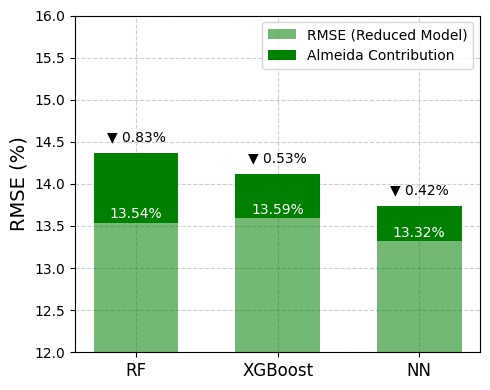

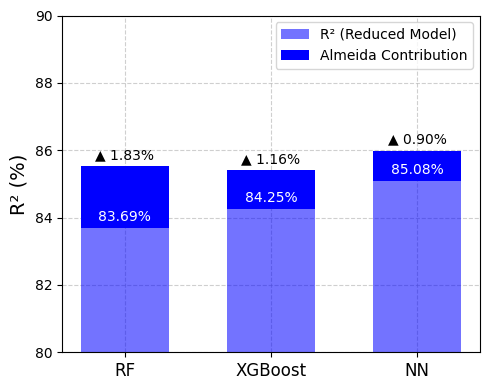

In [82]:
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting
models = ['RF', 'XGBoost', 'NN']

# RMSE and R² values for each model
rmse = [0.1437, 0.1412, 0.1374]  # Normal models (RF, XGBoost, NN)
rmse_almeida = [0.1354, 0.1359, 0.1332]  # Almeida models (RF, XGBoost, NN)

r2 = [0.8369, 0.8425, 0.8508]  # Normal models (RF, XGBoost, NN)
r2_almeida = [0.8552, 0.8541, 0.8598]  # Almeida models (RF, XGBoost, NN)

# Calculate the difference for the Almeida contribution
rmse_diff = [base - almeida for base, almeida in zip(rmse, rmse_almeida)]  # RMSE decreases are positive
r2_diff = [almeida - base for base, almeida in zip(r2, r2_almeida)]  # R² increases are positive

# Scale values to percentages
rmse_scaled = [value * 100 for value in rmse]
rmse_diff_scaled = [value * 100 for value in rmse_diff]
r2_scaled = [value * 100 for value in r2]
r2_diff_scaled = [value * 100 for value in r2_diff]

# Bar width and indices
bar_width = 0.6
indices = np.arange(len(models))

def add_labels_with_triangle(ax, rects_base, rects_diff, total_values, diff_values, metric='rmse'):
    """
    Add labels outside the bars for both base and diff bars with triangle indicators.

    Parameters:
    ax: Matplotlib axis object
    rects_base: Base bars
    rects_diff: Difference bars
    total_values: Total values (scaled)
    diff_values: Difference values (scaled)
    metric: 'rmse' or 'r2' to determine triangle direction
    """
    for base, diff, total, diff_val in zip(rects_base, rects_diff, total_values, diff_values):
        # Total value label
        height_base = base.get_height()
        ax.annotate(f'{total:.2f}%', 
                    xy=(base.get_x() + base.get_width() / 2, height_base),
                    xytext=(0, 3),  # Offset above bar
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10, color='white')

        # Difference value label with triangle
        height_diff = height_base + diff.get_height()
        if metric == 'rmse':
            triangle = '▼' if diff_val > 0 else '▲'  # Decrease is better
        elif metric == 'r2':
            triangle = '▲' if diff_val > 0 else '▼'  # Increase is better
        ax.annotate(f'{triangle} {abs(diff_val):.2f}%', 
                    xy=(diff.get_x() + diff.get_width() / 2, height_diff),
                    xytext=(0, 3),  # Offset above bar
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10)

# Plot RMSE
fig_rmse, ax_rmse = plt.subplots(figsize=(5, 4))

# Base bars for RMSE (Reduced model)
base_bars_rmse = ax_rmse.bar(indices, [value * 100 for value in rmse], bar_width, color='green', alpha=0.55, label='RMSE (Reduced Model)')

# Difference bars (Almeida contribution)
diff_bars_rmse = ax_rmse.bar(
    indices,
    rmse_diff_scaled,
    bar_width,
    bottom=[value * 100 for value in rmse_almeida],
    color='green',
    alpha=1,
    label='Almeida Contribution'
)

# Labels and title for RMSE plot
ax_rmse.set_ylabel('RMSE (%)', fontsize=14)
ax_rmse.set_xticks(indices)
ax_rmse.set_xticklabels(models, fontsize=12)
ax_rmse.grid(True, linestyle='--', alpha=0.6)
ax_rmse.set_axisbelow(True)
ax_rmse.set_ylim([12, 16])  # Adjusted scale for percentages

# Add labels with Almeida values and triangles
for i, (almeida, diff) in enumerate(zip([value * 100 for value in rmse_almeida], rmse_diff_scaled)):
    # Almeida model label (white text)
    ax_rmse.annotate(f'{almeida:.2f}%', 
                     xy=(indices[i], almeida), 
                     xytext=(0, 3), textcoords="offset points", 
                     ha='center', fontsize=10, color='white')

    # Difference with triangle (triangle placed above the bar)
    triangle = '▼' if diff > 0 else '▲'  # ▼ indicates a reduction in RMSE
    ax_rmse.annotate(f'{triangle} {abs(diff):.2f}%', 
                     xy=(indices[i], almeida + diff), 
                     xytext=(0, 8), textcoords="offset points",  # Place triangle above the bar
                     ha='center', fontsize=10, color='black')

# Save RMSE plot
plt.legend()
plt.tight_layout()
plt.savefig("rmse_almeida_vs_base_triangle.pdf", format='pdf')
plt.show()

# Plot R²
fig_r2, ax_r2 = plt.subplots(figsize=(5, 4))

# Base bars for R²
base_bars_r2 = ax_r2.bar(indices, r2_scaled, bar_width, color='blue', alpha=0.55, label='R² (Reduced Model)')

# Difference bars (Almeida contribution)
diff_bars_r2 = ax_r2.bar(indices, r2_diff_scaled, bar_width, bottom=r2_scaled, color='blue', alpha=1, label='Almeida Contribution')

# Labels and title for R² plot
ax_r2.set_ylabel('R² (%)', fontsize=14)
ax_r2.set_xticks(indices)
ax_r2.set_xticklabels(models, fontsize=12)
# ax_r2.set_title('R² Comparison (Base vs. Almeida)', fontsize=16)
ax_r2.grid(True, linestyle='--', alpha=0.6)
ax_r2.set_axisbelow(True)
ax_r2.set_ylim([80, 90])  # Adjusted scale for percentages

# Add labels with triangle
add_labels_with_triangle(ax_r2, base_bars_r2, diff_bars_r2, r2_scaled, r2_diff_scaled, metric='r2')

# Save R² plot
plt.legend()
plt.tight_layout()
plt.savefig("r2_almeida_vs_base_triangle.pdf", format='pdf')
plt.show()


# Option Indicator Analysis


In [ ]:
#Group1 r^2 and RMSE AMZN

models = ['OLS', 'ENet', 'GLM', 'RF', 'XGBoost', 'NN']

rmse = [0.22743427368672078, 0.22743050765990053,0.17509577405088386, 0.11507199308984215, 0.10772779360811517, 0.10780330253201657]
r2 = [0.18443580437449847, 0.18446281359483285, 0.5166100065159562, 0.7912215843234439, 0.8170207441085434, 0.8167641453530561 ]

#Group2 r^2 and RMSE TSLA
models = ['OLS', 'ENet', 'GLM', 'RF', 'XGBoost', 'NN']

rmse = [0.3046045859927939, 0.30460689005480124,0.2622198699812096, 0.1931174781673824, 0.19564403294293425, 0.18512780213109567]
r2 = [0.5114488736727709, 0.5114414827377827, 0.6379501773330241, 0.803627663852591, 0.7984557757103173, 0.8195402156853056]

#Group3 r^2 and RMSE Other
models = ['OLS', 'ENet', 'GLM', 'RF', 'XGBoost', 'NN']

rmse = [0.21897754512955156, 0.21898438361622924,0.18506495063133885, 0.14176524006213062, 0.14013718958967322, 0.13827665708458864]
r2 = [0.37488841619682933, 0.3748493721570868, 0.5535151442761146, 0.7380020479660923, 0.7439851314799779, 0.7507379717000294]
